In [ ]:
#Notes
#create visualization of data using matplot
#vary number of shots and plot accuracy as function of shots
#use different feature maps, z feature map and pauli feature map
#change number of repetitions
#type of entanglement linear or full (when dim = 2, same effect)
# https://www.kaggle.com/fengdanye/machine-learning-4-support-vector-machine


In [1]:
#import qiskit libaries
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

seed = 10599
aqua_globals.random_seed = seed
from sklearn import datasets
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import random

/Users/jameskim/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


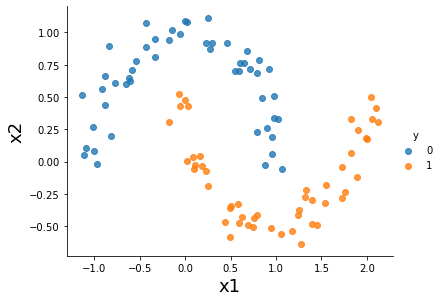

In [2]:
from sklearn.datasets import make_moons
X,y=make_moons(noise=0.1, random_state=2) # fix random_state to make sure it produces the same dataset everytime. Remove it if you want randomized dataset.
data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()

sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

Text(0.5, 1.0, 'title')

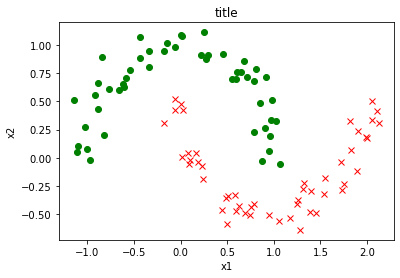

In [3]:
training_input = {
    "0" : [],
    "1" : []
}
test_input = {
    "0" : [],
    "1" : []
}
onex = []
oney = []
zerox = []
zeroy = []
for i in range(70):
    if data["y"][i] == 1:
        training_input["1"].append([data["x1"][i], data["x2"][i]])
        onex.append(data["x1"][i])
        oney.append(data["x2"][i])
    else:
        training_input["0"].append([data["x1"][i], data["x2"][i]])
        zerox.append(data["x1"][i])
        zeroy.append(data["x2"][i])
for i in range(70, 100):
    if data["y"][i] == 1:
        test_input["1"].append([data["x1"][i], data["x2"][i]])
        onex.append(data["x1"][i])
        oney.append(data["x2"][i])
    else:
        test_input["0"].append([data["x1"][i], data["x2"][i]])
        zerox.append(data["x1"][i])
        zeroy.append(data["x2"][i])

plt.plot(onex, oney, 'rx')
plt.plot(zerox, zeroy, 'go')
plt.xlabel("x1")
plt.ylabel("x2")

plt.title("title")

In [5]:
#Second order Pauli Z feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input)
backend = BasicAer.get_backend('qasm_simulator')
print(feature_map)

     ┌───┐┌──────────────┐                                           ┌───┐»
q_0: ┤ H ├┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ H ├»
     ├───┤├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└──────────────┘└───┘└───────────────────────────────┘└───┘└───┘»
«     ┌──────────────┐                                           
«q_0: ┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──
«     ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
«q_1: ┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └──────────────┘└───┘└───────────────────────────────┘└───┘


In [34]:
#first order Pauli Z feature map
feature_map = ZFeatureMap(feature_dimension=2, reps = 2)
qsvm = QSVM(feature_map, training_input, test_input)
backend = BasicAer.get_backend('qasm_simulator')

In [10]:
#Pauli Feature Map
feature_map = PauliFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input)
backend = BasicAer.get_backend('qasm_simulator')
print(feature_map)

     ┌───┐┌──────────────┐                                           ┌───┐»
q_0: ┤ H ├┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ H ├»
     ├───┤├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└──────────────┘└───┘└───────────────────────────────┘└───┘└───┘»
«     ┌──────────────┐                                           
«q_0: ┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──
«     ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
«q_1: ┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └──────────────┘└───┘└───────────────────────────────┘└───┘


500
1000
1500
2000
2500


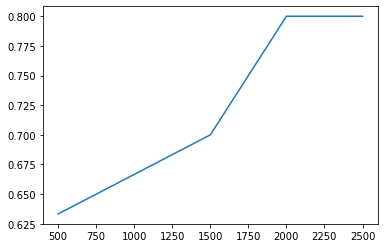

In [6]:
#accuracy as a function of shots
shots = []
accuracy = []

for i in range(500, 3000, 500):
    quantum_instance = QuantumInstance(backend, shots=i, seed_simulator=seed, seed_transpiler=seed)
    result = qsvm.run(quantum_instance)
    shots.append(i)
    accuracy.append(result["testing_accuracy"])
    print(i)

plt.plot(shots, accuracy)

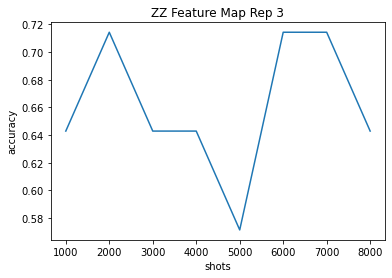

In [8]:
#plot, label, and save
plt.plot(shots, accuracy)
plt.xlabel("shots")
plt.ylabel("accuracy")
plt.title("Spiral Dataset accuracy ZZFeature Map")
plt.savefig('SpiralDatasetZZFeatureMap_accuracy.png')

Testing success ratio: 0.8


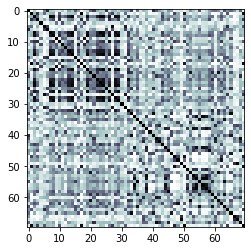

In [6]:
#one time test 
quantum_instance = QuantumInstance(backend, shots=2000, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')

#kernel matrix 
kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r');

Testing success ratio: 1.0



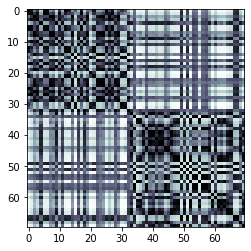

In [4]:
#classical SVM
from qiskit.aqua.algorithms import SklearnSVM

result = SklearnSVM(training_input, test_input).run()

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()

kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r');

Text(0.5, 1.0, 'title')

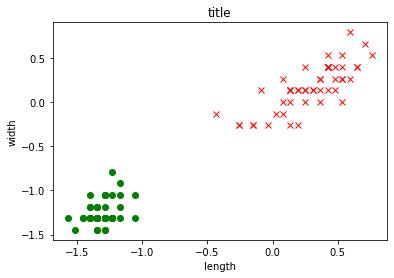

In [53]:
#linear dataset (fail)


iris = datasets.load_iris()
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

dataL = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
dataL['target'] = iris['target']
dataL = dataL[dataL['target']!=2] # we will only focus on Iris-setosa and Iris-Versicolor
dataL.head()

dataL.to_csv('data.csv', index=False, sep = '\t')
dataL2 = np.genfromtxt("data.csv", skip_header=1)
dataL2

np.random.shuffle(dataL2)
training_input = {
    "setosa" : [],
    "versicolor" : []
}
test_input = {
    "setosa" : [],
    "versicolor" : []
}
onex = []
oney = []
zerox = []
zeroy = []

for i in range(70):
    if dataL2[i][2] == 1:
        training_input["versicolor"].append([dataL2[i][0], dataL2[i][1]])
        onex.append(dataL2[i][0])
        oney.append(dataL2[i][1])
    else:
        training_input["setosa"].append([dataL2[i][0], dataL2[i][1]])
        zerox.append(dataL2[i][0])
        zeroy.append(dataL2[i][1])
for i in range(70, 100):
    if dataL2[i][2] == 1:
        test_input["versicolor"].append([dataL2[i][0], dataL2[i][1]])
        onex.append(dataL2[i][0])
        oney.append(dataL2[i][1])
    else:
        test_input["setosa"].append([dataL2[i][0], dataL2[i][1]])
        zerox.append(dataL2[i][0])
        zeroy.append(dataL2[i][1])
        
        
class_labels = ["versicolor", "setosa"]

plt.plot(onex, oney, 'rx')
plt.plot(zerox, zeroy, 'go')
plt.xlabel("length")
plt.ylabel("width")
plt.title("title")